BURIOL, Tiago M. (Março de 2022) - Matemática Computacional III - UFSM

*Aualizado em Março de 2024.*

# 1. Aproximações numéricas e discretização do domínio

## 1.1 Introdução

A resolução de problemas de ciências e engenharia por meio de métodos numéricos frequentemente requer a discretização do domínio do problema. Discretizar o domínio significa dividir o domínio contínuo de um problema matemático em um conjunto finito de pontos ou elementos discretos. Isso é feito para permitir que o problema seja resolvido numericamente em um computador, que não pode manipular funções contínuas infinitamente precisas.

A discretização do domínio geralmente envolve a escolha de um passo de grade, que é a distância entre os pontos discretos, e a criação de uma grade ou malha de pontos discretos no domínio. Em seguida, o problema contínuo é aproximado por um conjunto finito de equações em cada um desses pontos discretos. O resultado é um problema discreto que pode ser resolvido numericamente usando métodos computacionais.

A discretização do domínio é uma etapa crítica na resolução numérica de muitos problemas matemáticos, incluindo equações diferenciais parciais, problemas de valor de contorno e problemas de otimização. A escolha de como discretizar o domínio pode ter um grande impacto na precisão e eficiência da solução numérica.


Alguns exemplos de métodos numéricos que requerem a discretização do domínio são a derivação e a integração numérica de funções de uma variável. Vejamos alguns exemplos a seguir. 

### Exemplo 1: Discretização e cálculo da derivada numérica

A derivada de uma função $f(x)$ no ponto $x=p$ é definida como:

$$f'(p) = \lim\limits_{x \to p}\frac{f(x) - f(p)}{x-p}$$

A derivada de 1ª ordem em $x=p$ é a inclinação da reta tangente à função neste ponto, ou simplesmente, a inclinação da função. Assim, a derivada informa sobre a taxa de variação instantânea da função $y=f(x)$ em relação à variação de $x$ no ponto quando $x=p$.

Além disso, tomando $p$ suficientemente próximo de $x$ podemos inferir que uma boa aproximação para o valor da derivada 1ª de $f$ em $x$ será dada por 

$$f'(p) \approx \frac{f(x) - f(p)}{x-p}$$

Essa fórmula, conhecida como _diferença finita à direita_ fornece um valor aproximado para a inclinação da reta tangente usando a inclinação da reta secante à $f$ que intercepta o gráfico nos pontos $(x,f(x))$ e $(p, f(p))$.  

<img src="https://github.com/tiagoburiol/MatComp_III/blob/main/Notebook%2001%20-%20Aproxima%C3%A7%C3%B5es%20num%C3%A9ricas%20e%20discretiza%C3%A7%C3%A3o/imagens/derivada.png?raw=true" width="480">
<p style="text-align: center;">Figura 1.1 - Interpretação geométrica da derivada </p>

Podemos concluir facilmente que quanto mais próximo o ponto $p$ estiver de $x$, mais próxima a inclinação da reta secante estará da reta tangente. Em outras palavras, quanto menor o valor de $h=x-p$ melhor a aproximação obtida. 

**Discretização:** Obter numericamente aproximações para a derivada de uma função, portanto, requer discretizar uma região do domínio. No caso da uma função $y=f(x)$, podemos tomar $n+1$ pontos $x_i$, $i=0,1,...,n$ no intervalo $[x_0,x_n]$ como mostra a figura abaixo.

<img src="https://github.com/tiagoburiol/MatComp_III/blob/main/Notebook%2001%20-%20Aproxima%C3%A7%C3%B5es%20num%C3%A9ricas%20e%20discretiza%C3%A7%C3%A3o/imagens/grid.png?raw=true" width="500">
<p style="text-align: center;">Figura 1.2 - Discretização de um intervalo do domínio da função</p>

Podemos então, obter valores aproximados para a derivada de qualquer função em um conjunto discreto de pontos $x_1, x_2,...,x_n$ usando a fórmuda de diferença finita à direita com os pontos $x_i$ e $x_{i+1}$ com $i=0,1,...,n-1$. Vejamos alguns exemplos a seguir.

**Cálculo das derivadas numéricas:** Sabemos que a derivada primeira de $f(x)=sen(x)$ é $f'(x)=cos(x)$. Vamos calcular as derivadas numericamente e comparar os gráficos para alguns valores de $x$ dividindo o intervalo $(0, 2\pi)$ em 21 pontos igiualmente espaçados. 

In [1]:
# importando as libs
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# discretizando o intervalo (0,2pi)
xi = np.linspace(0, 2*np.pi, 21)
print (xi)

[0.         0.31415927 0.62831853 0.9424778  1.25663706 1.57079633
 1.88495559 2.19911486 2.51327412 2.82743339 3.14159265 3.45575192
 3.76991118 4.08407045 4.39822972 4.71238898 5.02654825 5.34070751
 5.65486678 5.96902604 6.28318531]


In [3]:
# obtendo as diferenças em xi
dxi = np.diff(xi)
print(dxi)

[0.31415927 0.31415927 0.31415927 0.31415927 0.31415927 0.31415927
 0.31415927 0.31415927 0.31415927 0.31415927 0.31415927 0.31415927
 0.31415927 0.31415927 0.31415927 0.31415927 0.31415927 0.31415927
 0.31415927 0.31415927]


Observe que a distância entre dois pontos consecutivos é constante e igual a $\frac{2\pi}{20}$ pois discretizamos o intervalo em 20 subintervalos de mesmo tamanho. O mesmo resultado acima poredria ser obtido fazendo `xi[1:]-xi[0:-1]`, ou ainda, `np.full(20, 2*np.pi/20)`, verifique!

In [4]:
# obtendo as diferenças em f(xi)=yi
yi = np.sin(xi)
dyi = np.diff(yi)
print(dyi)

[ 0.30901699  0.27876826  0.22123174  0.14203952  0.04894348 -0.04894348
 -0.14203952 -0.22123174 -0.27876826 -0.30901699 -0.30901699 -0.27876826
 -0.22123174 -0.14203952 -0.04894348  0.04894348  0.14203952  0.22123174
  0.27876826  0.30901699]


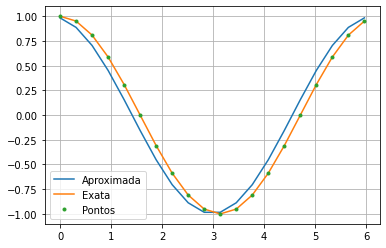

In [5]:
# plotando as derivadas aproximadas e exata
plt.plot(xi[0:-1], dyi/dxi, label='Aproximada')
plt.plot(xi[0:-1], np.cos(xi[0:-1]), label='Exata')
plt.plot(xi[0:-1], np.cos(xi[0:-1]), '.', label='Pontos')
plt.grid()
plt.legend()
plt.show()

Para ter uma ideia d precisão do resultado obtido podemos calcular o erro médio quadrático fazendo

In [6]:
err =np.sum((dyi/dxi-np.cos(xi[0:-1]))**2)/len(xi[0:-1])
print("Erro quadratico médio:",err)

Erro quadratico médio: 0.01226952697198515


A função `np.gradient` utiliza diferenças centrais de segunda ordem nos pontos interiores do intervalo, fornecendo uma aproximação melhor, e diferenças unilaterais de primeira ou segunda ordem (para frente ou para trás) nos limites do intervalo. O vetor gradiente devolvido, portanto, tem o mesmo tamanho do vetor de entrada. O mesmo exemplo anterior, usando a função `np.gradiente`.

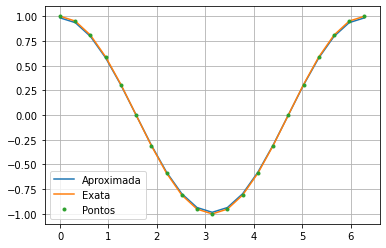

In [7]:
dfi = np.gradient(yi,xi)

# plotando as derivadas aproximadas e exata
plt.plot(xi, dfi, label='Aproximada')
plt.plot(xi, np.cos(xi), label='Exata')
plt.plot(xi, np.cos(xi), '.', label='Pontos')
plt.grid()
plt.legend()
plt.show()

In [8]:
err =np.sum((dfi-np.cos(xi))**2)/len(xi)
print("Erro quadratico médio:",err)

Erro quadratico médio: 0.00014034067569607228


Obseve que o erro quadrático médio é bem menor.

Agora observemos que a nos intervalos em que a inclinação da curva apresenta maior variação, a tendência é da derivada numérica apresentar um erro maior. Vamos modificar a discretização do intervalo de $0$ a $2\pi$ diminuindo o espaçamento entre os pontos proximos de $x=0$, $x=\pi$ e de $x=2\pi$.

In [9]:
x1 = np.linspace(0, 1.0, 6)
x2 = np.linspace(1.0, 2.5, 3)
x3 = np.linspace(2.5, 3.75, 6)
x4 = np.linspace(3.75, 5.25, 3)
x5 = np.linspace(5.25, 2*np.pi, 7)
xi = np.concatenate((x1[:-1], x2[:-1],x3[:-1], x4[:-1], x5))
print(len(xi))
print(xi)

21
[0.         0.2        0.4        0.6        0.8        1.
 1.75       2.5        2.75       3.         3.25       3.5
 3.75       4.5        5.25       5.42219755 5.5943951  5.76659265
 5.9387902  6.11098776 6.28318531]


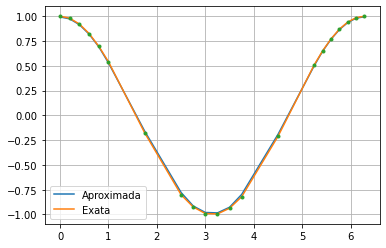

In [10]:
yi = np.sin(xi)
dfi = np.gradient(yi,xi)


# plotando as derivadas aproximadas e exata
plt.plot(xi, dfi, label='Aproximada')
plt.plot(xi, np.cos(xi), label='Exata')
plt.plot(xi, np.cos(xi), '.')

plt.grid()
plt.legend()
plt.show()

In [11]:
err =np.sum((dfi-np.cos(xi))**2)/len(xi)
print("Erro quadratico médio:",err)

Erro quadratico médio: 0.00011964200679385693


### Atividade:

Use esse exemplo para estudar a derivada numérica de outras funções com diferentes formas de discretização do intervalo. Compare e observe que quanto maior o número de pontos menor o erro de aproximação. 

Algumas funções sugeridas:

a) $f(x)=e^{2x}$

b) $f(x)=x ln(x)$

c) $f(x)=x cos(x)-x^2sen(x)$

d) $f(x)=2ln(x)^2+3sen(x)$

e) $f(x)=2^xsen(x)$

f) $f(x)=x^2e^x$

Para obter a solução exata para comparação, experimente a biblioteca `sympy`como é mostrado abaixo. 

In [12]:
import sympy as sp

x, y = sp.symbols('x y')
f = 2**x*sp.sin(x)
df = sp.diff(f, x)
df

2**x*log(2)*sin(x) + 2**x*cos(x)

Esperimente converter a derivada obtida com Sympy em uma função do numpy usando `lambdify`. Um exemplo é mostrado a seguir:

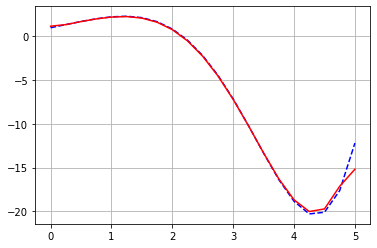

In [13]:
# transformando uma função do sympy em função lambda 
df = sp.lambdify(x, sp.diff(f, x))

# obtendo os ponto para plotar
xi = np.linspace(0,5,21)  
yi = 2**xi*np.sin(xi)

# plotando a derivada exata e aproximada
plt.plot(xi, df(xi),'b--',label='Exata')
plt.plot(xi, np.gradient(yi,xi), 'r',label='Aproximada')
plt.grid()
plt.show()

### Exemplo 2: Discretização cálculo da integral numérica

A forma mais simples de obter um valor aproximado para uma integral definida é por meio da soma de Riemann em que divide-se o intervalo de integração $(a,b)$ em $n$ subintervalos e somam-se as áreas dos retângulos definidos em cada subintervalo. 


A largura de cada retângulo será dado por $h=\frac{x_n-x_0}{n}$ e a altura será dada por $f(x)$ para algum $x$ dentro do subintervalo $[x_i,x_{i+1}]$, com $i=0,1,...,n$. Uma escolha natural para o valor de $x$ é um dos extremos do intervalo, o extremo esquerdo $x_i$ ("pela esquerda") ou o extremo direito $x_{i+1}$ ("pela direita"):

<img src="https://github.com/tiagoburiol/MatComp_III/blob/main/Notebook%2001%20-%20Aproxima%C3%A7%C3%B5es%20num%C3%A9ricas%20e%20discretiza%C3%A7%C3%A3o/imagens/Riemann.png?raw=true" width="600">

<p style="text-align: center;">Figura 1.3 - Discretização de um intervalo do domínio da função</p>
Claramente podemos aumentar a acurácia da aproximação obtida aumentando o número de subintervalos. A _regra do ponto médio_ considera a altura do retângulo definida em cada subintervalo como sendo o valor da função no ponto médio entre $x_i$ e $x_{i+1}$:

$$\int_a^b f(x)dx \approx \sum_{i = 0}^{n-1} hf\left(\frac{x_i+x_{i+1}}{2} \right)$$



**Discretização:** Obter numericamente aproximações para uma integral definira requer, portanto, discretizar o intervalo de integração. Isso pode ser feito dividindo o intervalo $(a,b)$ em $n$ subintervalos de amplitude $h = \frac{b-a}{n}$ e obtendo as cordenadas dos pontos faendo $x_i = x_0+hi$, com $i=1,2,...n-1$.

**Cálculo da integral numérica:** Vamos calcular a integral $\int_{0.1}^{0.8} x^2ln(x)dx$ usando `sympy` para obter a solução exata e, então, vamos obter aproximações usando soma de Riemann pela esquerda, pela direita e pela regra do ponto médio, e comparar os resultados. 

Primeiramente vamos obter a primitiva usando `sympy`.

In [14]:
import sympy as sp

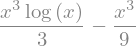

In [15]:
x = sp.symbols('x')
sp.init_printing(use_unicode=True)

f = x**2*sp.log(x)
F = sp.integrate(f, x)
F

Calculando o resultado a integral definida

In [16]:
F = sp.lambdify (x, F)
I = F(0.8)-F(0.1)
print(I)

-0.0940934155044049


Agora o resultado aproximado pela soma de Riemann com oito subintervalos (nove pontos).

In [17]:
xi = np.linspace(0.1, 0.8, 9)
h = xi[1]-xi[0]
print ("h=",h)

h= 0.0875


In [18]:
f = lambda x: x**2*np.log(x)

In [19]:
Ie = h*np.sum(f(xi[0:-1]))
print("Ie=",Ie, "Erro=",abs(I-Ie))

Ie= -0.08833876053340978 Erro= 0.0057546549709951295


In [20]:
Id = h*np.sum(f(xi[1:]))
print("Id=",Id, "Erro=",abs(I-Id))

Id= -0.09882003745063572 Erro= 0.004726621946230816


In [21]:
Im = h*np.sum(f((xi[0:-1]+xi[1:])/2))
print("Im=",Im, "Erro=",abs(I-Im))

Im= -0.0943509348508234 Erro= 0.00025751934641848884


Nesse exemplo é possivel notar que a regra do ponto médio forneceu a melhor aproximação.

A biblioteca `numpy` implementa a conhecida regra dos trapézios para integração numérica na fiuncão `trapz`. Para isso é preciso entrar com os valores da função no intervalo já discretizado, ou informar o tamanho do passo $h=dx$ Um exemplo é mostrado abaixo.

In [22]:
It = np.trapz(f(xi),xi)
print("It=",It, "Erro=",abs(I-It))

It= -0.09357939899202276 Erro= 0.0005140165123821427


ou

In [23]:
It = np.trapz(f(xi),dx=h)
print("It=",It, "Erro=",abs(I-It))

It= -0.09357939899202275 Erro= 0.0005140165123821566


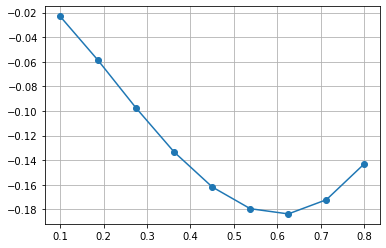

In [24]:
plt.plot(xi,f(xi),"o-")
plt.grid()
plt.show()

Observe que nos 4 primeiros pontos do gráfico acima a função se comporta como uma reta, assim, podemos mudar a posição dos pontos de modo a melhorar o resultado da aproximação apenas discretizando o intervalo de forma diferente. Aumentando o espaçamento dos pontos onde a função tem menor curvatura e diminuindo onde a função tem maior curvatura obtemos um resultado melhor com o mesmo número de pontos. Vejamos o exemplo a seguir. 

In [25]:
xi = np.array([0.1,0.3,0.425,0.5,0.55,0.615,0.685,0.75,0.8])
It = np.trapz(f(xi),xi)
print("It=",It, "Erro=",abs(I-It))

It= -0.0938642211312475 Erro= 0.00022919437315740976


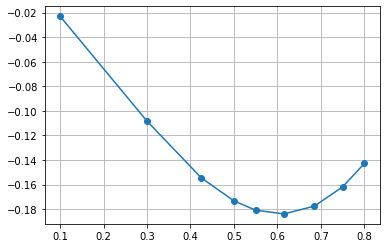

In [26]:
plt.plot(xi,f(xi),"o-")
plt.grid()
plt.show()

A biblioteca `scipy` implementa outros métodos de integração numérica, a partir de um conjunto discreto de pontos da função. A seguir mostramos como usar o método de Simpson e o método de Romberg (número de intervalos precisa ser uma potência de 2). Vejamos os exemplos a seguir usando a mesma função do exemplo anterior e diferentes discretizações.

In [27]:
from scipy import integrate
xi = np.linspace(0.1,0.8,9)
Is = integrate.simps(f(xi), xi)
print("Is=",Is, "Erro=",abs(I-Is))

Is= -0.09409838517861327 Erro= 4.969674208363251e-06


In [28]:
xi = np.linspace(0.1,0.8,9)
h = (0.8-0.1)/8
Ir = integrate.romb(f(xi),h)
print("Ir=",Ir, "Erro=",abs(I-Ir))

Ir= -0.09409409003030916 Erro= 6.74525904256762e-07


### Atividade:

Encontre, se possível, a primitiva das seguintes funções usando `sympy`, então obtenha a solução exata e compare com soluções numéricas usando diferentes métodos para diferentes formas de discretização. Compare os resultados.  
\begin{eqnarray*}
a) &\int_{1}^{1.6} \frac{2x}{x^2-4} dx&\,\,\,&
b) &\int_{0}^{1} x^2 e^{-x} dx&\,\,\,&
c) &\int_{0}^{\pi/4} e^{x^3}sen(2x)dx&\\
d) &\int_{0}^{0.5} \frac{2}{x-4} dx&\,\,\,&
e) &\int_{0}^{1} x^{-1/4}sen(x) dx&\,\,\,&
f) &\int_{0}^{1} \frac{e^{2x}}{\sqrt[5]{x^2}}dx\\
g) &\int_{0}^{1} \frac{ln(x)}{(1-x)^{1/5}}dx&\,\,\,&
h) &\int_{0}^{1} \frac{cos(2x)}{x^{1/3}}dx&\,\,\,&
i) &\int e^{x^2} dx\\
j) &\int \frac{e^x}{x} dx&\,\,\,&
k) &\int sen(x^2) dx&\,\,\,&
l) &\int ln(lnx) dx\\
m) &\int e^{-\frac{x^2}{2}}&\,\,\,&
n) &\int cos(x^2) dx&\,\,\,&
o) &\int cos(e^x) dx\\
p) &\int \frac{1}{ln(x)} dx&\,\,\,&
q) &\int \sqrt{1-x^4} dx&\,\,\,&
r) &\int x^2e^{x^3} dx
\end{eqnarray*}

**Exemplo 3: Solução numérica de uma EDO**

Outro caso em que podemos obter soluções aproximadas a partir da discretização do domínio de uma função no estudo das equações diferenciais. Para exemplificar, tomemos o caso de um paraquedista em queda livre após saltar de um balão de ar quente que encontrava-se parado (exemplo adaptado de Chapra e Canale, 2016). A segunda lei de Newton nos diz que a aceleração $a = dv/dt$ do paraquedista em cada instante $t$ é dada pela equação 

$$ \frac{dv}{dt}= \frac{F}{m}$$

em que $m$ é a massa do paraquedista e $F$ é a força devido à gravidade, a qual pode ser escrita de forma simplificada como

$$F = mg-cv$$

onde $g$ é a aceleração da gravidade, $c$ é uma constante de arrasto devido ao atrito com o ar e $v$ é a velocidade instantânea no instante $t$. Assim, tem-se que 

$$ \frac{dv}{dt}= g-\frac{c}{m}v$$ 

Que é uma equação diferencial ordinária de primeira ordem cuja solução exata é

$$v(t)=\frac{gm}{c}(1-e^{-(c/m)t})$$

Assim, considerando $g=9,81$ m/s$^2$, $c=12,5$ kg/s e $m=68,1$kg, obtemos 

$$ v(t)=\frac{9,81(68,1)}{12,5}\left(1-e^{-(12,5/68,1)t}\right)=53,44\left(1-e^{-0,18355t}\right)$$

Embora para este caso específico a solução exata da equação seja conhecida, podemos obter uma solução aproximada para um conjunto discretos de pontos. Para isso, bastaria usar uma aproximação para a derivada $dv/dt$ usando uma fórmula de diferenças finitas em dois instantes $t_i$ e $t_{i+1}$, como por exemplo

$$ \frac{dv}{dt}= \frac{v(t_{i+1})-v(t_i)}{t_{i+1}-t_i}$$ 

o que fornece

$$\frac{v(t_{i+1})-v(t_i)}{t_{i+1}-t_i} = g-\frac{c}{m}v(t_i)$$  

ou ainda

$$v(t_{i+1}) = v(t_i) + \left[ g-\frac{c}{m}v(t_i) \right] (t_{i+1}-t_i)$$  

que, para os valores de $g$, $c$ e $m$ dados, fica

$$v(t_{i+1}) = v(t_i) +  \left[ 9,81-0,18355v(t_i) \right] (t_{i+1}-t_i)$$ 

Agora, a partir do valor conhecido $v(t_0)=0$, em $t_0=0$s é possível obter os valores de $v(t_i)$ em um conjunto discreto de pontos, para $i = 1,2,3,...$.

**Discretização:** Obter numericamente aproximações para a solução de uma EDO requer, portanto, discretizar o domínio de interesse do problema. Nesse exemplo, vamos obter as velocidades nos 20 primeiros segundos de queda, discretizando esse intervalo em 10 subintervalos de dois segundos cada.  

In [29]:
# discretizando
ti = np.linspace(0,20,11)
print(ti)

[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20.]


In [30]:
12.5/68.1

**Cálculo da solução numérica:** Vamos calcular os valores de $v(t_i)$ a partir de $v(t_0)=v(0)=0$ usando a fórmula iterativa 

$$v(t_{i+1}) = v(t_i) + \left[ g-\frac{c}{m}v(t_i) \right] (t_{i+1}-t_i)$$

para os valores de $t$ discretizados.

In [31]:
vi = [0] 
for t in ti[:-1]:
    v = vi[-1] + (9.81-(12.5/68.1)*vi[-1])*2
    print (t,v)
    vi.append(v)

0.0 19.62
2.0 32.037356828193836
4.0 39.89621261813736
6.0 44.87002590075947
8.0 48.01791653924718
10.0 50.01019387432531
12.0 51.2710918646611
14.0 52.069105130204015
16.0 52.574161984020456
18.0 52.89380883276478


Agora vamos plotar o gráfico da solução numérica, obtida discretizando o domínio, a solução exata para comparação.

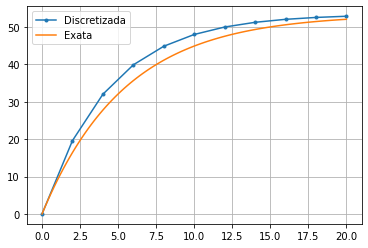

In [32]:
plt.plot(ti,vi,".-", label="Discretizada")

# mais pontos para a solução exata
t = np.linspace(0,20,101)
plt.plot(t,  53.44*(1-np.exp(-0.18355*t)),"-", label="Exata")
plt.grid()
plt.legend()
plt.show()

### Atividade:

**1.** Usando o exemplo anterior, calcule a solução do problema definido por

$$\begin{cases} 
   y' = f(x,y)=x-y+2 \\
   y(x_0)= y(0) = 2
  \end{cases}$$

com $x \in [a,b] = [0,1]$ e diferentes discretizações. Compare com a solução exata $y(x) = e^{-x}+x+1$.

**2.** Calcule numericamene a solução do problema definido por

$$ \begin{cases} 
u'= t^2(5-u)\\ 
0 \leq t \leq 2 \\
u(0)=0
\end{cases}$$
Comapre o resultado com a solução exata $u(t)=5-5e^{-t^3/3}$ para os passos $h=0,25$ e também $h=0,1$.

**3.** Encontre uma solução para  

$$\begin{cases}
2y'+ty=2 \\
y(0)=1
\end{cases}
$$

A solução é a curva destacada na figura abaixo. As outras curvas são soluções com outros calores de $y(0)$. Tente obter algumas dessas curvas numericamente.

<img src="imagens/pvi_3.png" width="360">

**4.** Encontre uma solução para 

$$\begin{cases}
ty'+2y=4t^2 \\
y(1)=2
\end{cases}
$$

e compare com $y=t^2+\frac{1}{t^2}, t>0$.
A solução é a curva destacada na figura abaixo.

<img src="imagens/pvi_4.png" width="360">

Até aqui mostramos alguns exemplos de aplicações em que é útil discretizar um intervalo de do domínio de funções de uma variável. Fizemos isso utilizando a conveniente função `linspace`da biblioteca `numpy`, mas essa não é a única forma de fazer isso. Vejamos outras alternativas, por exemplo, para discretizar um intervalo de $(0,2)$ em 6 pontos igualmente espaçados em 0,4.

In [33]:
# Usando a função arange(inicio, fim, passo)
np.arange(0,2.4,0.4)

array([0. , 0.4, 0.8, 1.2, 1.6, 2. ])

In [34]:
# Usando a função ogrid
np.ogrid[0:2:6j]

array([0. , 0.4, 0.8, 1.2, 1.6, 2. ])

In [35]:
# Usando a função mgrid
np.mgrid[0:2:6j]

array([0. , 0.4, 0.8, 1.2, 1.6, 2. ])

Cada uma dessas funções operam de forma diferente e podem ser mais ou menos adequadas para diferentes casos. Mais informações podem ser obtidas na documentação oficiao em:  https://numpy.org/doc/stable/reference/.

Para os casos bi e tridimensionais (2D e 3D) podemos combinar algumas dessas funções e obter coordenadas de pontos no plano ou no espaço que discretizam uma região plana ou um volume, respectivamente. Vejamos alguns exemplos.

Coordenadas x: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
Coordenadas y: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2. ]


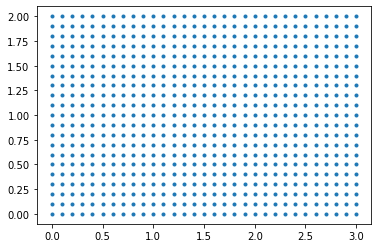

In [36]:
# Exemplo de discretização de uma região plana retangular
x = np.linspace(0,3,31)
y = np.linspace(0,2,21)

print ("Coordenadas x:", x)
print ("Coordenadas y:", y)

# usando a função meshgrid
xv, yv = np.meshgrid(x, y)
plt.scatter(xv, yv, marker='.')
plt.show()

Coordenadas r: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
Coordenadas t: [0.         0.05235988 0.10471976 0.15707963 0.20943951 0.26179939
 0.31415927 0.36651914 0.41887902 0.4712389  0.52359878 0.57595865
 0.62831853 0.68067841 0.73303829 0.78539816 0.83775804 0.89011792
 0.9424778  0.99483767 1.04719755 1.09955743 1.15191731 1.20427718
 1.25663706 1.30899694 1.36135682 1.41371669 1.46607657 1.51843645
 1.57079633]


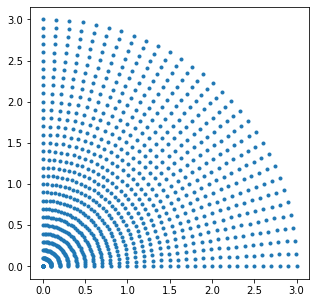

In [37]:
# Exemplo de discretização de um setor circular
r = np.linspace(0,3, 31)
t = np.linspace(0, np.pi/2, 31)

print ("Coordenadas r:", r)
print ("Coordenadas t:", t)

# usando a função meshgrid
rv, tv = np.meshgrid(r, t)

plt.figure(figsize=(5, 5))
plt.scatter(rv*np.cos(tv), rv*np.sin(tv), marker='.')
plt.show()

Coordenadas x: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
Coordenadas y: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2. ]


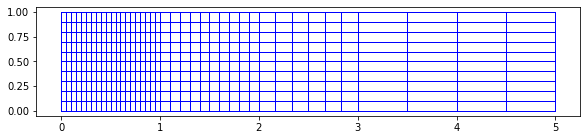

In [38]:
# Outro caso: concatenando arrays em x para criar com 4 resoluções
x1 = np.linspace(0, 1, 21)
x2 = np.linspace(1, 2, 11)
x3 = np.linspace(2, 3, 7)
x4 = np.linspace(3, 5, 5)
x_pts = np.concatenate((x1[:-1], x2[:-1],x3[:-1], x4))

y_pts = np.linspace(0, 1, 11)

print ("Coordenadas x:", x)
print ("Coordenadas y:", y)

fig, ax = plt.subplots(figsize=(10,2))

for y in y_pts:
    for x in x_pts:
        plt.hlines(y, x_pts[0],x_pts[-1],'b',lw=1)
        plt.vlines(x, y_pts[0],y_pts[-1],'b',lw=1)
        

plt.gca().set_aspect('equal')
plt.show() 

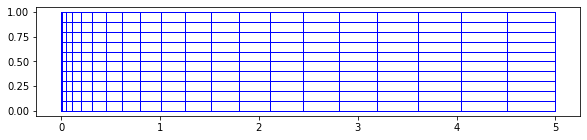

In [39]:
#Outro caso: espaçamento em x crescendo quadraticamente
x = np.linspace(0, 1, 21)

y_pts = np.linspace(0, 1, 11)
x_pts = 5*np.linspace(0, 1, 21)**2

fig, ax = plt.subplots(figsize=(10,2))

for y in y_pts:
    for x in x_pts:
        plt.hlines(y, x_pts[0],x_pts[-1],'b',lw=0.5)
        plt.vlines(x, y_pts[0],y_pts[-1],'b',lw=0.5)
        
ax.set_aspect('equal')
plt.show() 

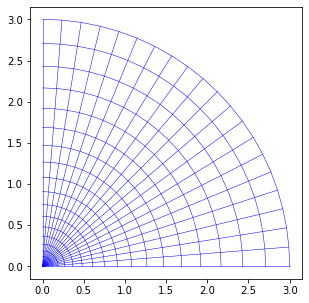

In [40]:
# Exemplo de discretização de um setor circular variando r quadraticamente
r = 3*np.linspace(0, 1, 21)**2
t = np.linspace(0, np.pi/2, 21)

fig, ax = plt.subplots(figsize=(5,5))

for ti in t:
    plt.plot(r*np.cos(ti), r*np.sin(ti), 'b', lw=0.5)
for ri in r:
    plt.plot(ri*np.cos(t), ri*np.sin(t), 'b', lw=0.5)

plt.gca().set_aspect('equal')
plt.show() 

No exemplo a seguir vamos representar graficamente a função $z=f(x,y)=x^2+2y^2$. Para isso vamos discretizar a região retangular $-10\leq x \leq10$ e $-10\leq y \leq10$. 

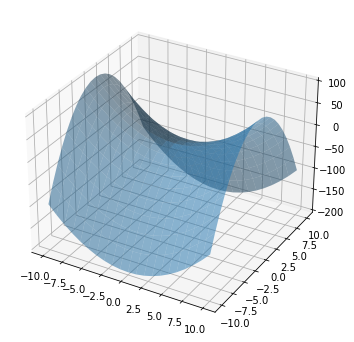

In [41]:
#cria a malha
x = np.linspace(-10, 10, 21)
y = np.linspace(-10, 10, 21)
x, y = np.meshgrid(x, y)

# define a função
f = lambda x,y: x**2 - 2*y**2
z = f(x,y)

#cria a figura
fig = plt.figure(figsize=(6,6))

# plota
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x, y, z, alpha=0.5)
#ax.plot_wireframe(x, y, z, lw=0.5)
#ax.scatter3D(x, y, -250, alpha=0.7,marker='.')
plt.show()

### Mais alguns exemplos

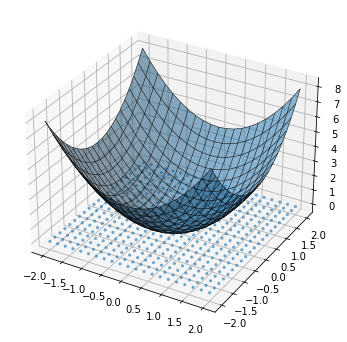

In [42]:
#cria a malha
x = np.linspace(-2, 2, 21)
y = np.linspace(-2, 2, 21)
x, y = np.meshgrid(x, y)

# define a função
f = lambda x,y: x**2 + y**2
z = f(x,y)

#cria a figura
fig = plt.figure(figsize=(6,6))

# plota
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x, y, z, alpha=0.5)
ax.plot_wireframe(x, y, z, lw=0.5,color='black')
ax.scatter3D(x, y, 0, alpha=0.5,marker='.')

plt.show()

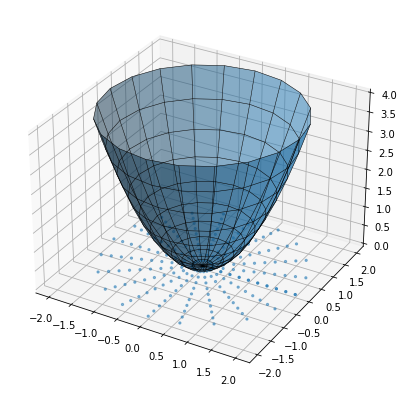

In [43]:
# usando a função meshgrid
r = 2*np.linspace(0, 1, 11)
t = np.linspace(0, 2*np.pi, 21)

# usando a função meshgrid
rv, tv = np.meshgrid(r, t)

x = rv*np.cos(tv)
y = rv*np.sin(tv)

# define a função
f = lambda x,y: x**2 + y**2
z = f(x,y)

#cria a figura
fig = plt.figure(figsize=(7,7))

# plota
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x, y, z, alpha=0.5)
ax.plot_wireframe(x, y, z, lw=0.5,color='black')
ax.scatter3D(x, y, 0, alpha=0.5,marker='.')
ax.set_zlim(0, 4)
plt.show()

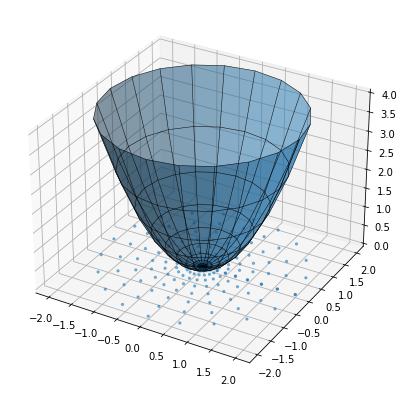

In [44]:
# usando a função meshgrid
r = 2*np.linspace(0, 1, 11)**2
t = np.linspace(0, 2*np.pi, 21)

# usando a função meshgrid
rv, tv = np.meshgrid(r, t)

x = rv*np.cos(tv)
y = rv*np.sin(tv)

# define a função
f = lambda x,y: x**2 + y**2
z = f(x,y)

#cria a figura
fig = plt.figure(figsize=(7,7))

# plota
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x, y, z, alpha=0.5)
ax.plot_wireframe(x, y, z, lw=0.5,color='black')
ax.scatter3D(x, y, 0, alpha=0.5,marker='.')
ax.set_zlim(0, 4)
plt.show()

### Exemplos de discretização do espaço 3d

No exemplo a seguir vamos ver como discretizar o volume $0 \leq x\leq 6$,  $0 \leq y\leq 6$ e $0 \leq z\leq 6$ em uma grade regular do $R^3$, obter os valores da função que fornece a distância de um ponto $(x,y,z)$ do espaço cartesiano até o ponto $(3,2,1)$ e representar graficamente. 

Então, temos a função de três variáveis 

$$d(x,y,z)=\sqrt{(x-3)^2+(y-2)^2+(z-1)^2}$$

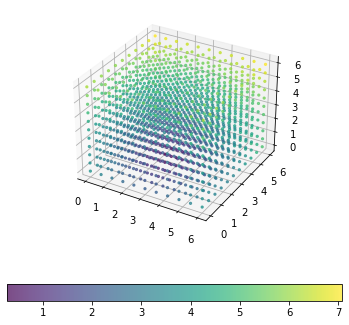

In [45]:
z = np.linspace(0, 6, 11)
x = np.linspace(0, 6, 11)
y = np.linspace(0, 6, 11)
xi, yi, zi = np.meshgrid(x, y, z)

d = lambda x,y,z: np.sqrt((x-3)**2+\
                          (y-2)**2+\
                          (z-1)**2)
# Creating figure
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection="3d")

# Creating plot
sc = ax.scatter3D(xi, yi, zi, c=d(xi,yi,zi), alpha=0.7, marker='.')
plt.colorbar(sc,location="bottom")
plt.show()

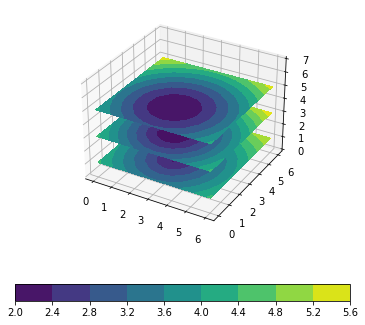

In [46]:
w = d(xi,yi,zi)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')

for z in [1,3,5]:
    c = ax.contourf(xi[:,:,z], yi[:,:,z], 
                    w[:,:,z], 10, 
                    zdir='z', offset=z)
plt.colorbar(c, location="bottom")
ax.set_zlim((0.,7))
plt.show()

**Exercícios:** Plote as seguintes funções (Thomas, v.2, p.214-216)

a) $z = sen(x) + 2sen(y)$

b) $z = (4x^2+y^2)e^{-x^2-y^2}$

c) $z = xye^{-y^2}$

d) $z = cos(x)cos(y)e^{-\sqrt{x^2+y^2}/4}$

e) $w = 4ln(x^2+y^2-3z^2)$

f) $w = x^2+sen(y)+e^{1/z}$

g) $w = sen(x/2)-cos(x)\sqrt{x^2+z^2}$

h) $v(t) = \left(sen(3t)cos(t), sen(3t)sen(t), t \right)$

i) $v(t) = \left(cos(t), sen(t), sen(2t) \right)$

j) $v(t) = \left(4+sen(20t)cos(t), 4+sen(20t)sen(t), coz(20t) \right)$

k) $u(x,y) =  \left( -\frac{x}{(x^2+y^2)^{3/2}}, -\frac{y}{(x^2+y^2)^{3/2}}    \right)$

l) $u(x,y,z) =  \left( -\frac{2x}{(x^2+y^2)}, -\frac{2y}{(x^2+y^2)}, e^z    \right)$

###  Comentários finais

A discretização do domínio é uma etapa importante da resolução de problemas por métodos numéricos computacionais, pois pode interferir diretamente no esforço computacional e na qualidade dos resultados. Por essa razão existem diferentes técnicas para a geração de malhas discretizadas, odendo ser mais ou menos adequadas a uma determinada aplicação. Algumas das técnicas mais comuns são descritas a seguir.


**Discretização em malhas estruturadas:**
Nesse método, a região do domínio é dividida em células retangulares, cubos ou outras formas regulares, de modo que a grade tenha uma estrutura geométrica definida. As equações diferenciais são aproximadas nos pontos da grade usando diferenças finitas, volumes finitos ou elementos finitos. Essa técnica é relativamente fácil de implementar e eficiente para problemas com geometrias simples. No entanto, pode ser difícil aplicar em problemas com geometrias complexas.

**Discretização em malhas não estruturadas:**
Nesse método, a grade é construída com base em um conjunto de pontos de controle que são conectados por meio de elementos, como triângulos ou tetraedros. Isso permite maior flexibilidade na modelagem de geometrias complexas e pode fornecer uma resolução mais precisa. As equações diferenciais são aproximadas nos pontos de controle usando métodos como elementos finitos ou volumes finitos.

<img src="https://github.com/tiagoburiol/MatComp_III/blob/main/Notebook%2001%20-%20Aproxima%C3%A7%C3%B5es%20num%C3%A9ricas%20e%20discretiza%C3%A7%C3%A3o/imagens/structured-unstructured.png?raw=true" width="400" class="center" >
<p style="text-align: center;">Figura 1.4 -Exemplo de discretização de um dominio 2D em malha estruturada e não estruturada</p>


<img src="https://github.com/tiagoburiol/MatComp_III/blob/main/Notebook%2001%20-%20Aproxima%C3%A7%C3%B5es%20num%C3%A9ricas%20e%20discretiza%C3%A7%C3%A3o/imagens/unstructured3d.png?raw=true" width="600">
<p style="text-align: center;">Figura 1.5 -Exemplo de discretização de um dominio 3D em malha estruturada e não estruturada</p>
    
**Método Multigrid:**
O método multigrid é uma técnica iterativa que é usada para acelerar a convergência das soluções numéricas. Ele começa com uma grade grosseira e realiza iterações em níveis de resolução cada vez mais fina, até que a solução final seja alcançada. Isso permite que o método resolva o problema em escalas diferentes e evite erros numéricos que ocorrem em escalas maiores ou menores. A técnica multigrid pode ser usada em conjunto com outras técnicas de discretização, como malhas estruturadas ou não estruturadas.

**Método de elementos finitos:**
O método de elementos finitos é um método numérico que divide o domínio em elementos finitos. Cada elemento é uma pequena região do domínio e é aproximado por uma função matemática. As equações diferenciais são então aproximadas nos elementos finitos e a solução final é obtida por meio de um processo de integração. Esse método é amplamente utilizado na engenharia, física e outras disciplinas científicas.

**Método de volumes finitos:**
O método de volumes finitos é semelhante ao método de elementos finitos, mas divide o domínio em volumes ao invés de elementos. As equações diferenciais são então aproximadas na superfície dos volumes finitos e a solução final é obtida por meio de um processo de integração. Esse método é comumente usado para resolver problemas de fluxo de fluidos e transferência de calor.

<img src="https://github.com/tiagoburiol/MatComp_III/blob/main/Notebook%2001%20-%20Aproxima%C3%A7%C3%B5es%20num%C3%A9ricas%20e%20discretiza%C3%A7%C3%A3o/imagens/malha_aviao.png?raw=true" width="600">
<p style="text-align: center;">Exemplo de uma malha híbrida (Tysell, 2010)<\p>


Essas são apenas algumas das técnicas mais comuns de discretização em métodos numéricos. A escolha da técnica adequada depende do problema que está sendo resolvido e das características da geometria e das equações diferenciais envolvidas.



**Referências**

BOURDEN, Richard L. e FAIRES, J. Douglas. Análise Numérica. . Tradução da 10ª edição norte-americana, 2016. Ed Cengage.

CHAPRA, Steven S. e CANALE, Raymond P. Métodos Numéricos para Engenharia. 7ª Edição. Editora McGraw-Hill.
